In [1]:
 # 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  # for ANOVA

In [2]:
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sl = pd.read_csv("../data/sierra_leone_clean.csv")

benin["country"] = "Benin"
togo["country"] = "Togo"
sl["country"] = "Sierra Leone"

df_all = pd.concat([benin, togo, sl])

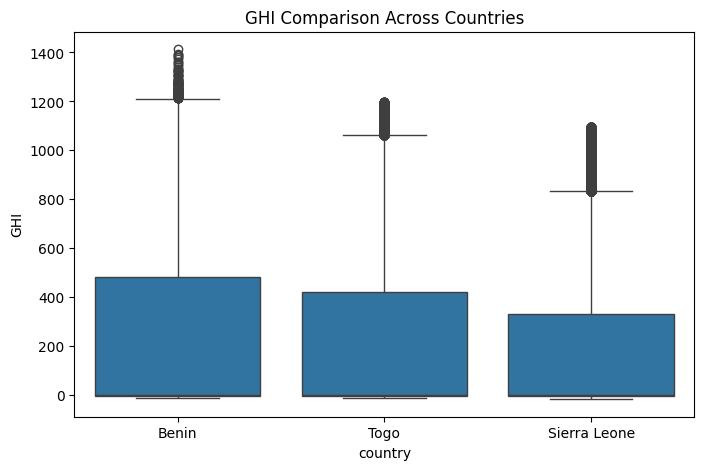

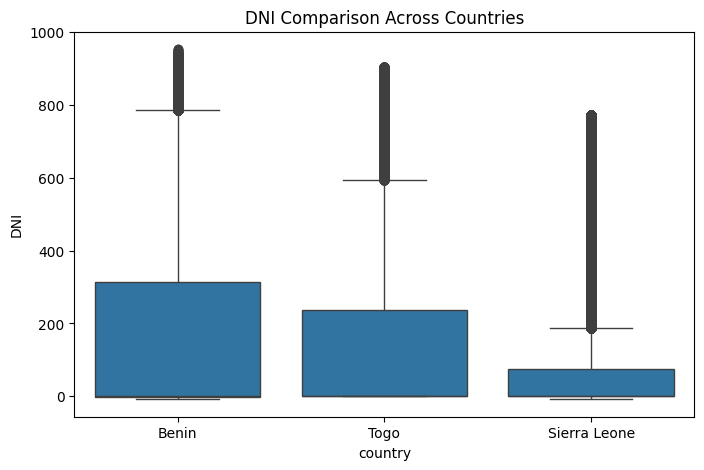

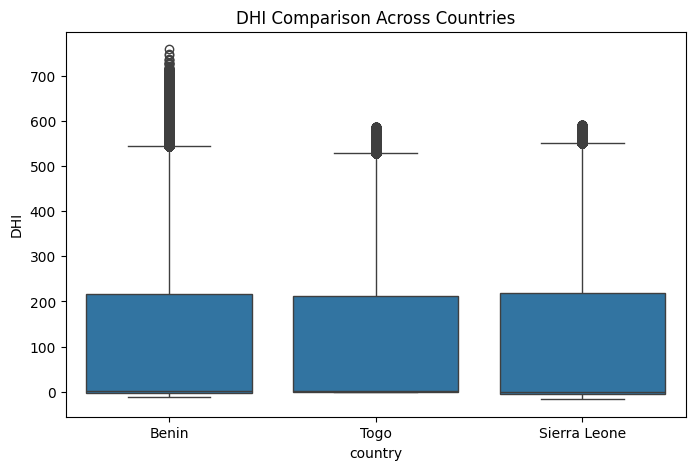

In [3]:
# 📊 Boxplots for GHI/DNI/DHI
for col in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="country", y=col)
    plt.title(f"{col} Comparison Across Countries")
    plt.show()

In [4]:
# 📑 Summary Table
summary_stats = df_all.groupby("country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                      GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744  


In [5]:
# 📏 ANOVA Test for GHI
f_stat, p_val = f_oneway(benin["GHI"].dropna(), togo["GHI"].dropna(), sl["GHI"].dropna())
print(f"\nANOVA for GHI:\nF-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Significant difference in GHI across countries.")
else:
    print("No significant difference in GHI across countries.")


ANOVA for GHI:
F-statistic: 4351.64, P-value: 0.0000
Significant difference in GHI across countries.
